Created on Fri Apr  3 19:31:55 2015

@author: JD Davis

A visual analysis of polio disease rates
from 1888-2013

Most of the data in this set are about diseases that are preventable with vaccination.  These analyses are done for fun and for learning.  A more serious statistical handling of the data would utilize *time-series* analysis and not a ordinary least squares regression.  When time allows I will revise this tutorial.

website for data: https://www.healthdata.gov
Data set : ProjectTyco_Level1

Analysis done in Python 3.4

In [43]:
import pandas as pd
import csv

In [44]:
data_file = "/Users/Work/Desktop/disease.hx.csv"
with open(data_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    data = list(reader)

In [45]:
#take a peak at the data set

len(data) # get an idea of number of observations

print ('number of columns', len(reader.fieldnames))

number of columns 10


In [46]:
#write a function so you can read in data in smaller chunks
#useful for larger data sets, and it also memorizes the path for you!
def dataset(path):
    with open(path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            yield row

In [47]:
#find out which diseases are represented
print (set([row ["disease"] for row in dataset(data_file)]))

{'MUMPS', 'SMALLPOX', 'PERTUSSIS', 'MEASLES', 'DIPHTHERIA', 'RUBELLA', 'HEPATITIS A', 'POLIO'}


In [48]:
#look at range of years

print ('first year of observations', min(set([int(row['epi_week']) for row in dataset (data_file)])))
#looks like starts in epi_week 1916, week 1

#now let's look at the latest date
print ('last year of observations', max(set(int(row["epi_week"]) for row in dataset(data_file))))


first year of observations 191601
last year of observations 201152


In [49]:
{row ["disease"] for row in dataset(data_file)}
(['RUBELLA', 'POLIO', 'MEASLES', 'HEPATITIS A', 'DIPHTHERIA', 'PERTUSSIS',
  'SMALLPOX', 'MUMPS'])

['RUBELLA',
 'POLIO',
 'MEASLES',
 'HEPATITIS A',
 'DIPHTHERIA',
 'PERTUSSIS',
 'SMALLPOX',
 'MUMPS']

In [50]:
#now let's do some simple statistical analysis and visualization
       
import csv
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/Work/Desktop/disease.hx.csv', index_col='id')                      

#let's look at some summary statistics and do a regression
df.dtypes #see what the variables are and their data type
df.describe() #descriptive stats

,Unnamed: 0,epi_week,number,population,inc
count,759467.000000,759467.000000,759420.000000,759467.000000,759467.000000
mean,379734.000000,196057.747140,32.759649,3510385.659389,1.450848
std,219239.382783,2573.487654,180.236408,4644710.023281,5.432002
min,1.000000,191601.000000,0.000000,10008.000000,0.000000
25%,189867.500000,193832.000000,0.000000,554000.000000,0.000000
50%,379734.000000,195603.000000,1.000000,2016000.000000,0.070000
75%,569600.500000,198238.000000,10.000000,4440859.000000,0.740000
max,759467.000000,201152.000000,10402.000000,37691912.000000,683.060000


In [51]:
#make a new object that has only the POLIO cases
df2 = df.copy()
df2
df3=df2[df2['disease'].isin(['POLIO'])]
df3

#lastly we'll look at quantiles
from scipy.stats.mstats import mquantiles
print ('quantiles:', mquantiles(df.inc))

quantiles: [ 0.    0.07  0.74]


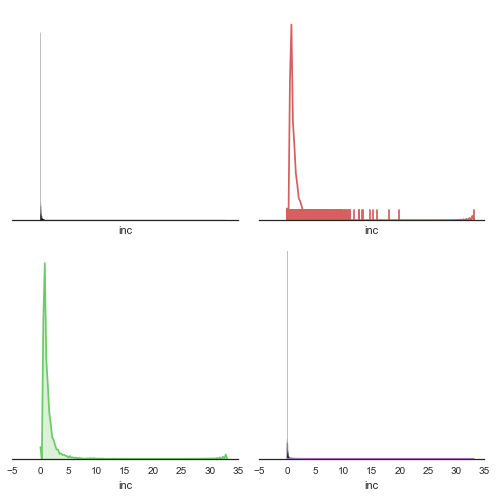

In [52]:
#make your first visual

import seaborn as sns

sns.set(style="white", palette="muted")
f, axes = plt.subplots(2,2, figsize=(7,7), sharex=True)
sns.despine(left=True)
b, g, r, p = sns.color_palette("muted", 4)
sns.distplot(df3.inc, kde=False, color=b, ax=axes[0,0])
sns.distplot(df3.inc, hist=False, rug=True, color=r, ax=axes[0,1])
sns.distplot(df3.inc, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1,0])
sns.distplot(df3.inc, color=p, ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()


We see that first year for Polio monitoring was 1928 and the last year with
a significant count was 1968. For Polio subset 81531 records exist in the data set.
The maximum incidence ratio during this time period was 33 and minimum
was zero.

In [62]:
#histogramming the data for Polio
s = pd.Series(df3.inc)
pd.value_counts(s) #the data on the frequency of values

df3.describe()

,Unnamed: 0,epi_week,number,population,inc
count,759467.000000,759467.000000,759420.000000,759467.000000,759467.000000
mean,379734.000000,196057.747140,32.759649,3510385.659389,1.450848
std,219239.382783,2573.487654,180.236408,4644710.023281,5.432002
min,1.000000,191601.000000,0.000000,10008.000000,0.000000
25%,189867.500000,193832.000000,0.000000,554000.000000,0.000000
50%,379734.000000,195603.000000,1.000000,2016000.000000,0.070000
75%,569600.500000,198238.000000,10.000000,4440859.000000,0.740000
max,759467.000000,201152.000000,10402.000000,37691912.000000,683.060000


You will see that time, i.e. epi_week is strongly associated with incidence, 
but there is a fairly high skew rate (9.447) and Kurtosis is very high (209.747).
Thus its inappropriate to use a linear regression with the data in this format.  The AIC and BIC values are also very high.  A time-series analysis would be more interesting.  Perhaps some further visualization will provide more insight into the data.

In [63]:
import numpy as np
import statsmodels.api as sm

x = df3.epi_week
y = df3.inc
results = sm.OLS(y, x).fit()
print (results.summary()) 


                            OLS Regression Results                            
Dep. Variable:                    inc   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                 5.310e+04
Date:                Sun, 31 May 2015   Prob (F-statistic):               0.00
Time:                        00:07:57   Log-Likelihood:            -2.3634e+06
No. Observations:              759467   AIC:                         4.727e+06
Df Residuals:                  759466   BIC:                         4.727e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
epi_week     7.33e-06   3.18e-08    230.431      0.0

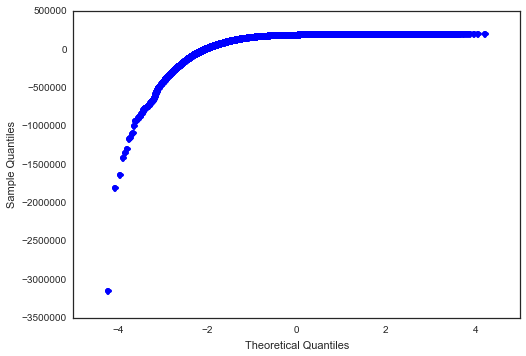

In [55]:
#let's look at the data in a probability plot to see what might be the problem
import statsmodels.api as sm
from matplotlib import pyplot as plt
mod_fit = sm.OLS(df3.epi_week, df3.inc).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

#the problem with a linear regression model may be that at about -1 quantiles
#the samples flatten out, i.e. there is little variability...again this is due to the advent of vaccination most likely


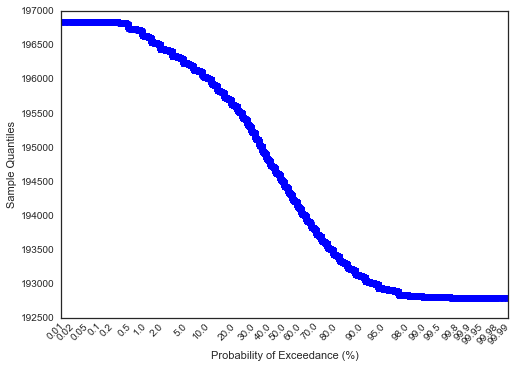

In [56]:
pp_x = sm.ProbPlot(x, fit=True)
x = df3.epi_week
y = df3.inc
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
fig2 = pp_x.probplot(exceed=True)

#fig 2 above suggests we should select dates between 1925 and 1970
#if we want to perform a linear regression, however for this analysis
#probably not a meaningful assessment

Let's do one last visualization to look at the incidence over time by, 
state, week and population. The new visual assessment shows that incidence of polio grew before it was virtually eliminated by 1988.  Since we do see some variability by state we might want to subset again by region of the country.  However that's another lesson!  For this lesson we will compare Texas (south) to California (west) to Massachusetts(east), to Illinois(north).

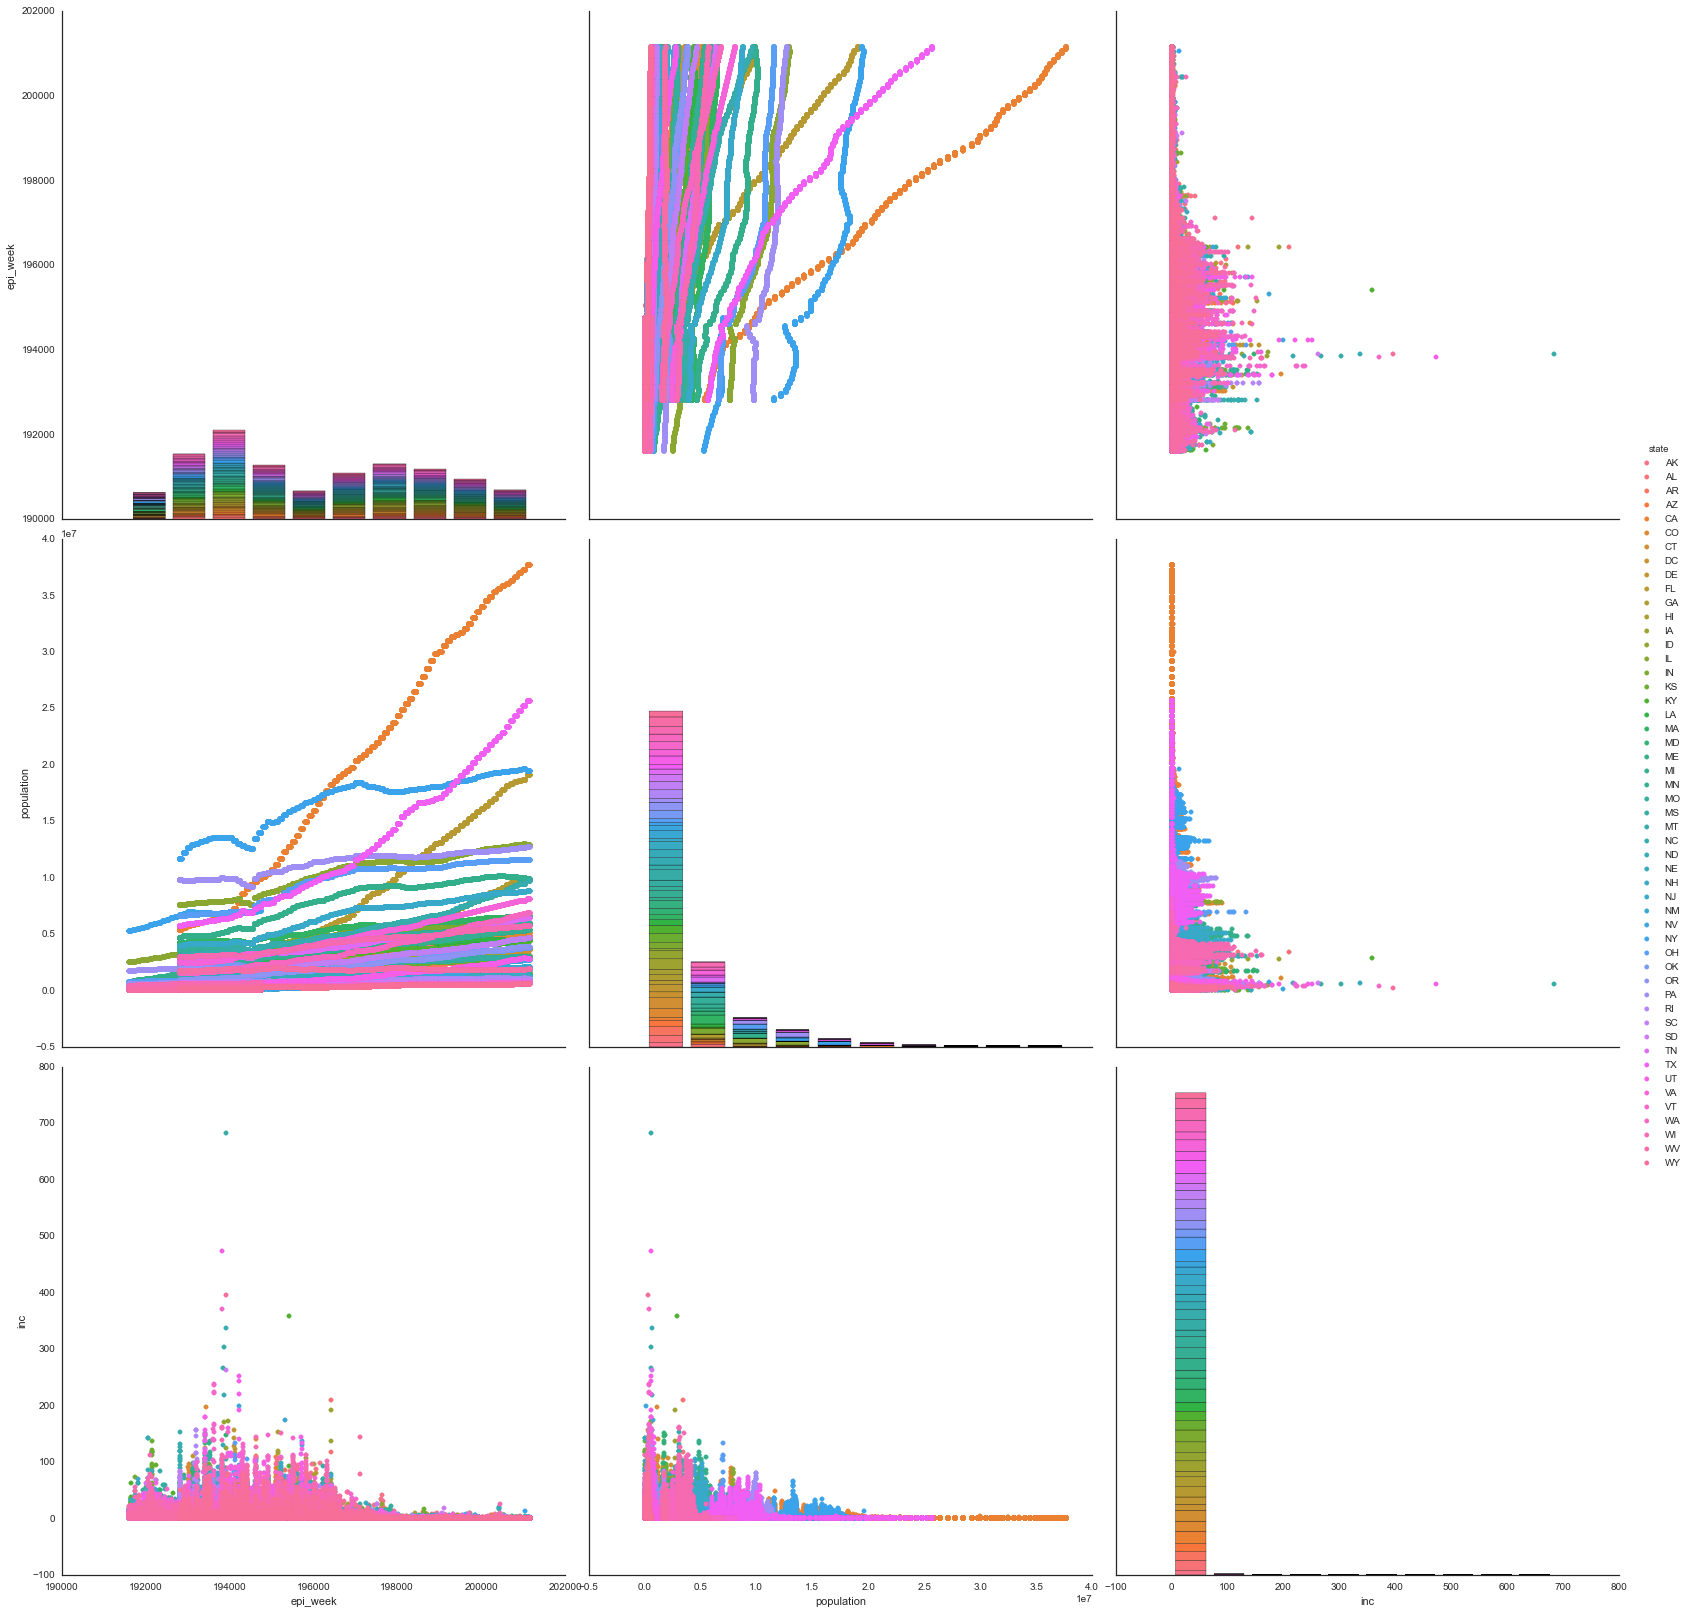

In [64]:
sns.pairplot(df3, hue="state", vars=('epi_week', 'population', 'inc'),
             size=7.5)
             

In [58]:
df3 = df.copy()
df3
df.south=df3[df3['state'].isin(['TX'])]
df.south

df.north = df3[df3['state'].isin(['IL'])]
df.west = df3[df3['state'].isin(['CA'])]
df.east = df3[df3['state'].isin(['MA'])]
df.east


,Unnamed: 0,disease,epi_week,loc,state,number,population,inc,loc_type
id,,,,,,,,,
42,42,HEPATITIS A,196601,MASSACHUSETTS,MA,10,5535000,0.18,STATE
63,63,HEPATITIS A,196602,MASSACHUSETTS,MA,10,5535000,0.18,STATE
109,109,HEPATITIS A,196603,MASSACHUSETTS,MA,17,5535000,0.31,STATE
160,160,HEPATITIS A,196604,MASSACHUSETTS,MA,18,5535000,0.33,STATE
197,197,HEPATITIS A,196605,MASSACHUSETTS,MA,13,5535000,0.23,STATE
219,219,HEPATITIS A,196606,MASSACHUSETTS,MA,8,5535000,0.14,STATE
301,301,HEPATITIS A,196607,MASSACHUSETTS,MA,6,5535000,0.11,STATE
320,320,HEPATITIS A,196608,MASSACHUSETTS,MA,6,5535000,0.11,STATE
366,366,HEPATITIS A,196609,MASSACHUSETTS,MA,8,5535000,0.14,STATE


In [59]:
df.east.describe()
df.west.describe() #highest incidence
df.north.describe()
df.south.describe() #lowest incidence


,Unnamed: 0,epi_week,number,population,inc
count,20507.000000,20507.000000,20505.000000,20507.000000,20507.000000
mean,428807.584337,195778.789389,79.614387,8710005.451017,1.496397
std,229081.019134,2573.082308,350.446220,7367872.867904,4.448394
min,26.000000,191602.000000,0.000000,41280.000000,0.000000
25%,229453.500000,193614.500000,1.000000,301520.000000,0.010000
50%,456011.000000,194851.000000,4.000000,7626000.000000,0.210000
75%,644586.500000,198024.000000,32.000000,14746318.000000,1.210000
max,759456.000000,201152.000000,6795.000000,25674681.000000,73.440000


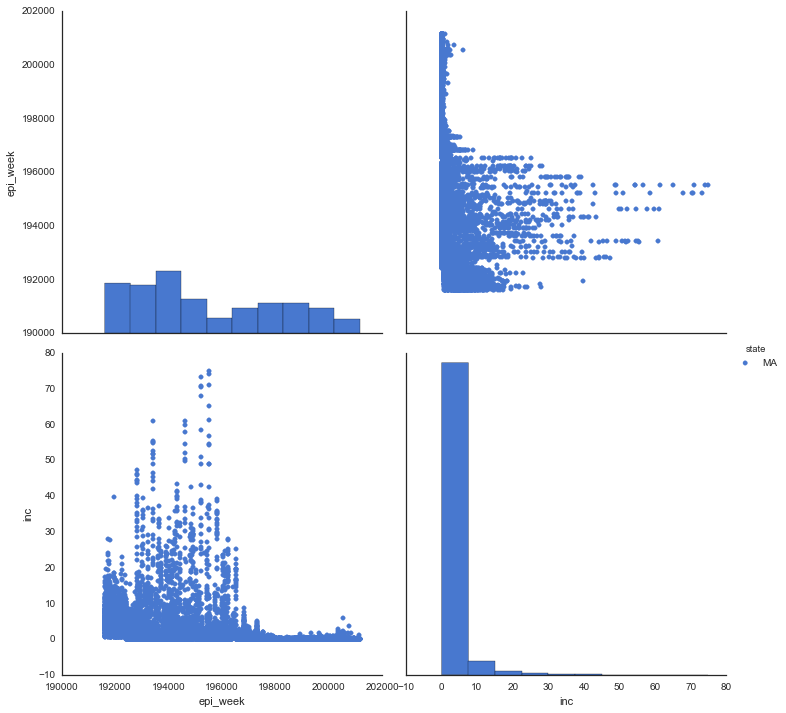

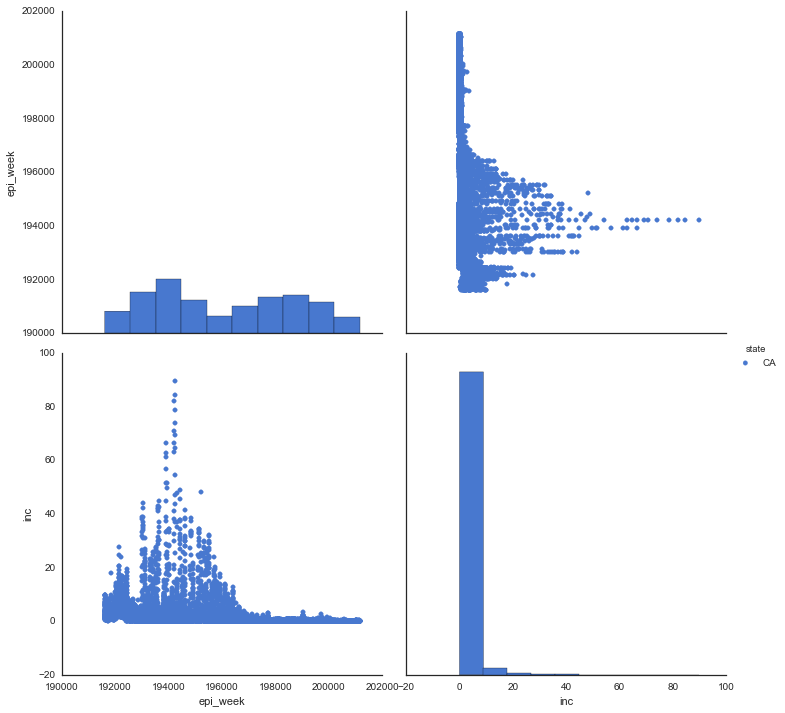

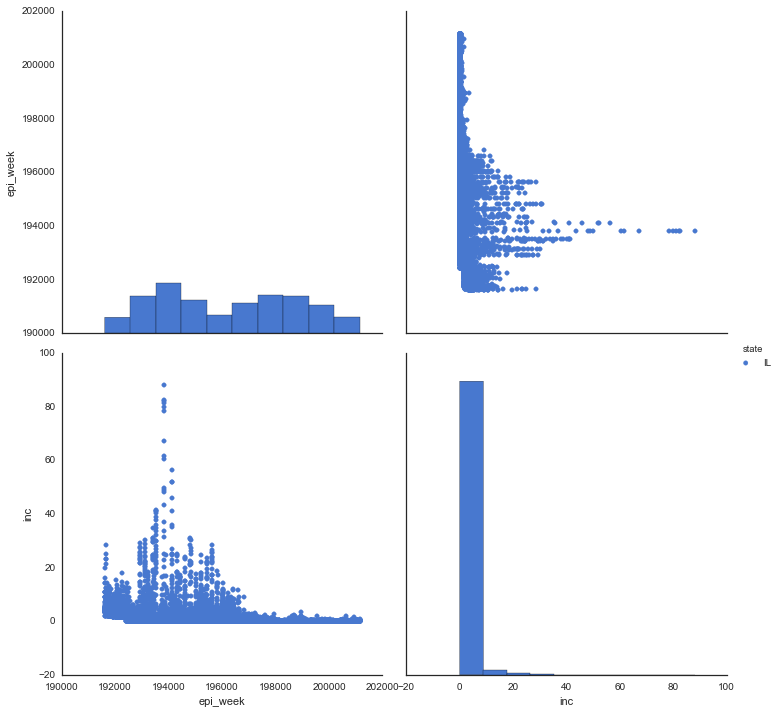

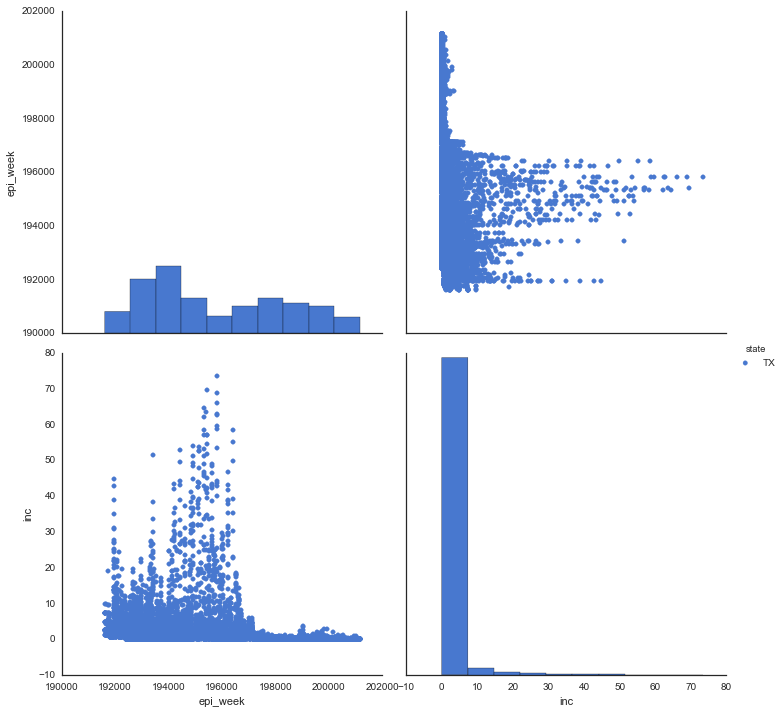

In [60]:
#now let's look at variables from before
sns.pairplot(df.east, hue="state", vars=('epi_week', 'inc'),
             size=5) #MA high incidence 1940-late 1960s
             
sns.pairplot(df.west, hue="state", vars=('epi_week', 'inc'),
             size=5) #CA incidence peaks in the 1940s and declines thereafter
             
sns.pairplot(df.north, hue="state", vars=('epi_week', 'inc'),
             size=5) #IL incidence peaks in the 1940s and declines thereafter

sns.pairplot(df.south, hue="state", vars=('epi_week', 'inc'),
             size=5) #TX you can see the incidence peaked in the 1960s


Our final visual assessment shows something quite interesting.  It looks
as though a peak in polio incidence occurred in MA, CA and IL in the late 1940s, but TX peaked in the late 1950s.  It would be interesting to explore the data further to determine if this is a real effect and if so to explore history to determine why there was a lag in decline of polio in TX.  More number crunching would be necessary to verify our visual assessment.  I plan to follow up on this analysis, but this short study shows the power of visualization and why its helpful prior to data analysis.